# BATTLE BETWEEN NEIGHBORHOODS OF TORONTO

<b>Objectives - Part 1</b>:

1)The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood


2)Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.


3)More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.


4)If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.


5)In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

In [1]:
import pandas as pd
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]

df

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


In [2]:
df = df[df.Borough != 'Not assigned']
df



,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [3]:
df.groupby(['Postal Code','Borough'])['Neighborhood'].apply(lambda x: ','.join(x.astype(str))).reset_index()

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."



df.loc[df['Neighborhood'] =='Not assigned' , 'Neighborhood'] = df['Borough']
df

In [4]:
df.shape


(103, 3)

<b>Objectives - Part 2</b>:

1)Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data.

2)Explore and cluster the neighborhoods in Toronto.


<b> Importing longitudes and latitudes for postal codes </b>

In [5]:
df1 = pd.read_csv("http://cocl.us/Geospatial_data")
df1

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [6]:
df = pd.merge(df, df1, on = "Postal Code")
df

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


<b>Objectives - Part 3</b>:

To generate maps to visualize your neighborhoods and how they cluster together.


<b> Importing necessary libraries for map visualization and analysis </b>

In [7]:

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

 
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [8]:

address = 'Toronto, ON, Canada'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, ON, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, ON, Canada are 43.6534817, -79.3839347.


In [9]:
# create map of Toronto using latitude and longitude values
map_Toronto = folium.Map(location=[latitude,longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood,borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

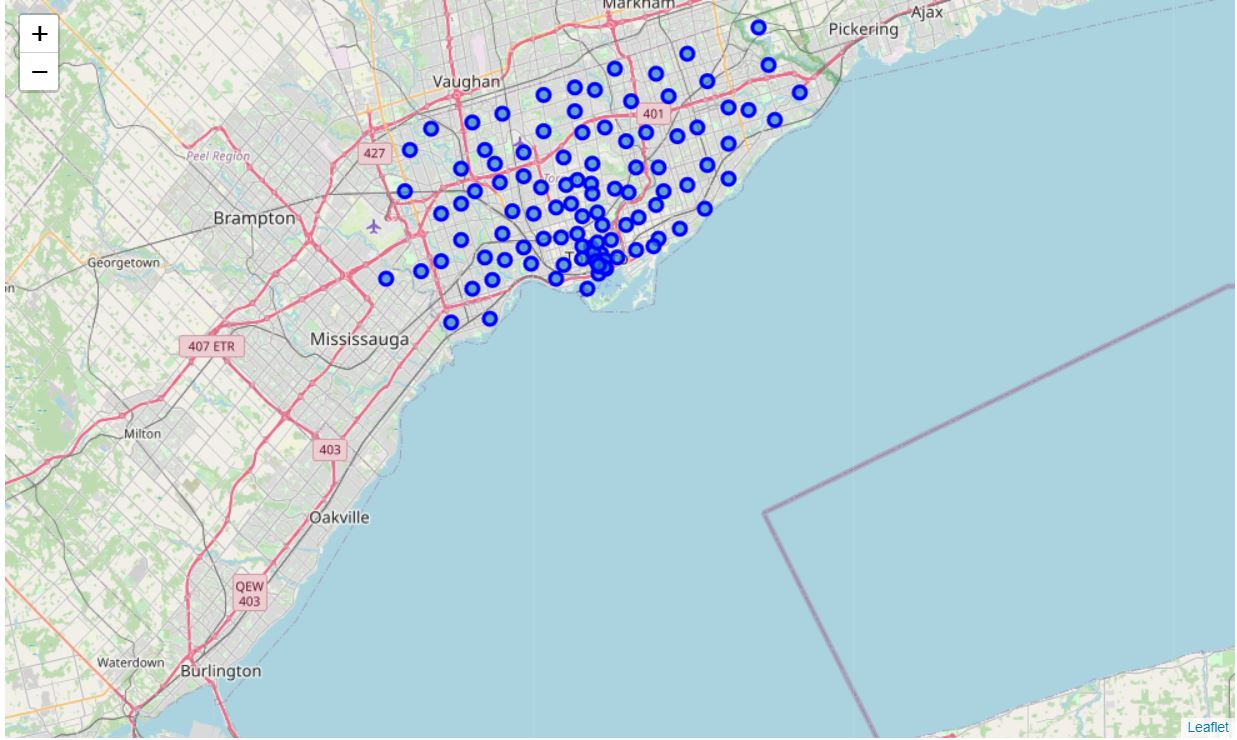

<b>Defining foursquare credentials:</b>

In [46]:
#Foursquare details entered here/ hidden

In [11]:
# defining radius and limit of venues to get
radius=500
LIMIT=100

In [12]:

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:

toronto_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

<b>Checking size of resulting dataframe:</b>

In [14]:
print(toronto_venues.shape)
toronto_venues.head()

(2130, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Parkwoods,43.753259,-79.329656,Corrosion Service Company Limited,43.752432,-79.334661,Construction & Landscaping
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


<b>The number of venues per neighborhood:</b>

In [15]:
toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Agincourt,5,5,5,5,5,5
"Alderwood, Long Branch",8,8,8,8,8,8
"Bathurst Manor, Wilson Heights, Downsview North",20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",23,23,23,23,23,23
...,...,...,...,...,...,...
"Willowdale, Willowdale West",6,6,6,6,6,6
Woburn,3,3,3,3,3,3
Woodbine Heights,6,6,6,6,6,6


<b>Let's find out how many unique categories can be curated from all the returned venues</b>

In [16]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 272 uniques categories.


<b> Analyzing each neighborhood</b>

In [17]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:

toronto_onehot.shape

(2130, 272)

<b>Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category</b>


In [19]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,"Willowdale, Willowdale West",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,York Mills West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



<b>Let's print each neighborhood along with the top 5 most common venues</b>

In [20]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0                     Lounge   0.2
1  Latin American Restaurant   0.2
2             Clothing Store   0.2
3             Breakfast Spot   0.2
4               Skating Rink   0.2


----Alderwood, Long Branch----
          venue  freq
0   Pizza Place  0.25
1  Skating Rink  0.12
2          Pool  0.12
3           Gym  0.12
4   Coffee Shop  0.12


----Bathurst Manor, Wilson Heights, Downsview North----
               venue  freq
0               Bank  0.10
1        Coffee Shop  0.10
2  Mobile Phone Shop  0.05
3     Sandwich Place  0.05
4     Ice Cream Shop  0.05


----Bayview Village----
                 venue  freq
0   Chinese Restaurant  0.25
1                 Café  0.25
2                 Bank  0.25
3  Japanese Restaurant  0.25
4          Yoga Studio  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0  Italian Restaurant  0.09
1         Coffee Shop  0.09
2          Restaurant  0.09
3      Sandwich Place  0.09
4  

4        Miscellaneous Shop   0.0


----Humberlea, Emery----
                       venue  freq
0             Baseball Field   1.0
1                Yoga Studio   0.0
2         Miscellaneous Shop   0.0
3  Middle Eastern Restaurant   0.0
4         Mexican Restaurant   0.0


----Humewood-Cedarvale----
          venue  freq
0  Hockey Arena  0.25
1         Field  0.25
2    Playground  0.25
3         Trail  0.25
4   Yoga Studio  0.00


----India Bazaar, The Beaches West----
                  venue  freq
0                  Park  0.08
1  Fast Food Restaurant  0.08
2           Pizza Place  0.08
3            Board Shop  0.04
4                   Pub  0.04


----Kennedy Park, Ionview, East Birchmount Park----
                venue  freq
0       Train Station   0.2
1  Chinese Restaurant   0.2
2         Bus Station   0.2
3         Coffee Shop   0.2
4    Department Store   0.2


----Kensington Market, Chinatown, Grange Park----
                           venue  freq
0                           Café  

                 venue  freq
0                 Café  0.10
1          Coffee Shop  0.08
2            Gastropub  0.05
3              Brewery  0.05
4  American Restaurant  0.05


----Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park----
                venue  freq
0         Coffee Shop  0.12
1                 Pub  0.12
2  Light Rail Station  0.06
3                Bank  0.06
4         Supermarket  0.06


----The Annex, North Midtown, Yorkville----
            venue  freq
0  Sandwich Place  0.14
1            Café  0.14
2     Coffee Shop  0.10
3        Pharmacy  0.05
4    Liquor Store  0.05


----The Beaches----
                      venue  freq
0                     Trail   0.2
1          Asian Restaurant   0.2
2         Health Food Store   0.2
3                       Pub   0.2
4  Mediterranean Restaurant   0.0


----The Danforth West, Riverdale----
                    venue  freq
0        Greek Restaurant  0.19
1             Coffee Shop  0.07
2      Italian Restaurant  0.07

<b>Let's put that into a pandas dataframe</b>

In [21]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [22]:
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Latin American Restaurant,Clothing Store,Lounge,Breakfast Spot,Skating Rink,Colombian Restaurant,Comfort Food Restaurant,Eastern European Restaurant,Dumpling Restaurant,Drugstore
1,"Alderwood, Long Branch",Pizza Place,Skating Rink,Coffee Shop,Gym,Pub,Pool,Sandwich Place,Dim Sum Restaurant,Dance Studio,Deli / Bodega
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Sushi Restaurant,Mobile Phone Shop,Pharmacy,Pizza Place,Middle Eastern Restaurant,Deli / Bodega,Restaurant,Bridal Shop
3,Bayview Village,Café,Bank,Japanese Restaurant,Chinese Restaurant,Women's Store,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Sandwich Place,Italian Restaurant,Restaurant,Grocery Store,Pharmacy,Juice Bar,Liquor Store,Indian Restaurant,Pub


<b> Cluster Neighborhoods</b>

In [23]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)


toronto_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster_Labels,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,1.0,1.0,Park,Food & Drink Shop,Construction & Landscaping,Diner,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Discount Store,Curling Ice
1,M4A,North York,Victoria Village,43.725882,-79.315572,1.0,1.0,Coffee Shop,Portuguese Restaurant,Hockey Arena,Pizza Place,Intersection,Dim Sum Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1.0,1.0,Coffee Shop,Park,Pub,Bakery,Café,Restaurant,Theater,Breakfast Spot,Yoga Studio,Shoe Store
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,1.0,1.0,Clothing Store,Accessories Store,Furniture / Home Store,Women's Store,Arts & Crafts Store,Event Space,Miscellaneous Shop,Boutique,Athletics & Sports,Coffee Shop
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1.0,1.0,Coffee Shop,Diner,Sushi Restaurant,Distribution Center,Bar,Smoothie Shop,Beer Bar,Italian Restaurant,Sculpture Garden,Sandwich Place


In [32]:
toronto_merged=toronto_merged.dropna()

In [34]:

toronto_merged['Cluster_Labels'] = toronto_merged.Cluster_Labels.astype(int)

Visualizing all the clusters

In [35]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

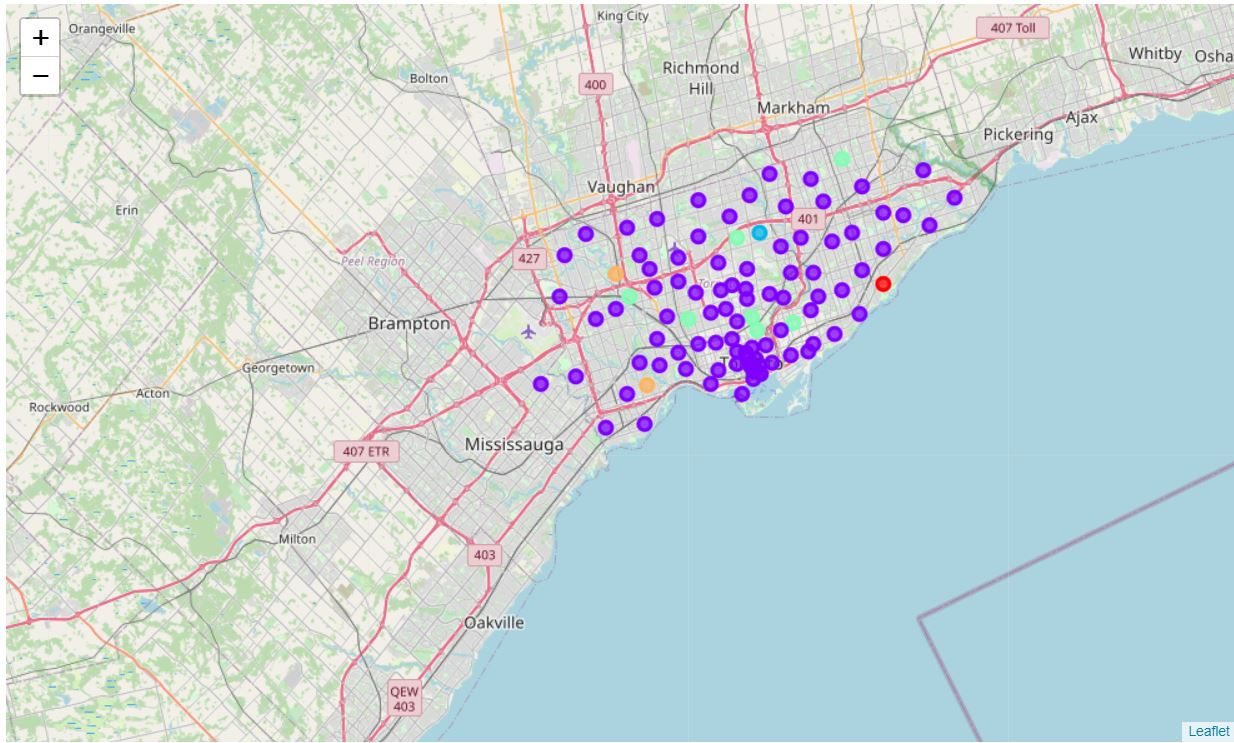


<b>Examine Clusters</b>

Cluster 1

In [38]:
toronto_merged.loc[toronto_merged['Cluster_Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster_Labels,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,Scarborough,0,0,Motel,American Restaurant,Women's Store,Curling Ice,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store


Cluster 2

In [43]:

toronto_merged.loc[toronto_merged['Cluster_Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster_Labels,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,1,1,Park,Food & Drink Shop,Construction & Landscaping,Diner,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Discount Store,Curling Ice
1,North York,1,1,Coffee Shop,Portuguese Restaurant,Hockey Arena,Pizza Place,Intersection,Dim Sum Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop
2,Downtown Toronto,1,1,Coffee Shop,Park,Pub,Bakery,Café,Restaurant,Theater,Breakfast Spot,Yoga Studio,Shoe Store
3,North York,1,1,Clothing Store,Accessories Store,Furniture / Home Store,Women's Store,Arts & Crafts Store,Event Space,Miscellaneous Shop,Boutique,Athletics & Sports,Coffee Shop
4,Downtown Toronto,1,1,Coffee Shop,Diner,Sushi Restaurant,Distribution Center,Bar,Smoothie Shop,Beer Bar,Italian Restaurant,Sculpture Garden,Sandwich Place
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Downtown Toronto,1,1,Coffee Shop,Café,Restaurant,Hotel,Gym,Salad Place,American Restaurant,Steakhouse,Asian Restaurant,Japanese Restaurant
98,Etobicoke,1,1,River,Pool,Women's Store,Dim Sum Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Cupcake Shop
99,Downtown Toronto,1,1,Sushi Restaurant,Coffee Shop,Japanese Restaurant,Gay Bar,Restaurant,Burger Joint,Hotel,Mediterranean Restaurant,Men's Store,Yoga Studio
100,East Toronto,1,1,Skate Park,Pizza Place,Brewery,Restaurant,Spa,Farmers Market,Fast Food Restaurant,Burrito Place,Butcher,Auto Workshop


Cluster 3

In [42]:
toronto_merged.loc[toronto_merged['Cluster_Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster_Labels,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
45,North York,2,2,Cafeteria,Women's Store,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center,Curling Ice


Cluster 4

In [44]:
toronto_merged.loc[toronto_merged['Cluster_Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster_Labels,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,York,3,3,Park,Women's Store,Bakery,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center
35,East York,3,3,Park,Convenience Store,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center,Curling Ice
64,York,3,3,Park,Discount Store,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center,College Arts Building
66,North York,3,3,Park,Convenience Store,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center,Curling Ice
83,Central Toronto,3,3,Playground,Park,Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store,Cupcake Shop
85,Scarborough,3,3,Park,Playground,Women's Store,Diner,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant
91,Downtown Toronto,3,3,Park,Trail,Playground,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner


Cluster 5

In [45]:
toronto_merged.loc[toronto_merged['Cluster_Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster_Labels,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,North York,4,4,Baseball Field,Distribution Center,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Women's Store,Ethiopian Restaurant
101,Etobicoke,4,4,Baseball Field,Distribution Center,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Women's Store,Ethiopian Restaurant
